## Simulación de la ecuación de calor
Vamos a intentar simular la ecuación de calor 

$$ \frac{\partial u}{\partial t}(x, t) = \alpha \frac{\partial^2 u}{\partial x^2}(x, t) $$ 


Usando la funcion tradicional $d_t(x)$ y las propiedades de la Transformada de Fourier con respecto a la convolución. Dejando nuestra ecuación de la siguiente forma 

$$ \frac{\partial \hat{u}}{\partial t}(\omega, t) = \alpha \cdot \hat{d_t(\omega)} \cdot \hat{u}(\omega, t) $$


Donde cada punto $\omega$ se puede interpretar como su propia ecuación diferencial de primer orden. Esto es lo que usarmeos para resolver este problema.

### Seteando el espacio
Vamos a crear el espacio, su transformación y la transformación de la aproximación tradicional.

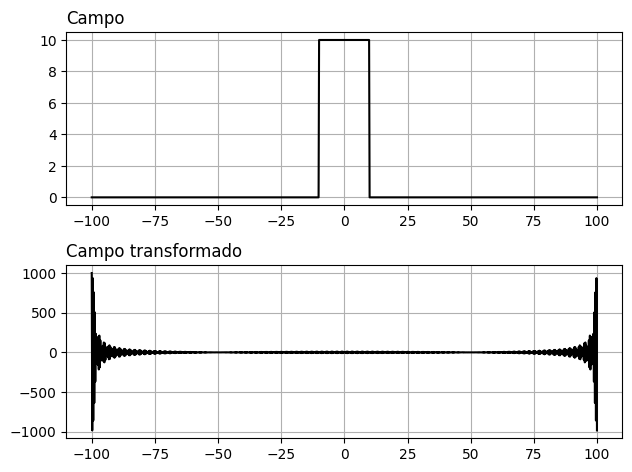

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from AvanzarSimulacion import AvanzarSimulacion
from Transformaciones import TransformacionDelCampo, DestransformacionDelCampo

radio = 100
cantidadPuntos = 1001
x = np.linspace(-radio, radio, cantidadPuntos)
dx = (2 * radio) / (cantidadPuntos - 1)

campo = np.zeros(len(x))
centro = int(np.floor(cantidadPuntos / 2))
desviacion = 50
campo[centro - desviacion : centro + desviacion] = 10

campoTransformado = TransformacionDelCampo(campo)

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, campo, 'k-')
plt.grid(True)
plt.title('Campo', loc = 'left')
plt.tight_layout(pad=1.0)

plt.subplot(2, 1, 2)
plt.plot(x, np.real(campoTransformado), 'k-')
plt.grid(True)
plt.title('Campo transformado', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

Usando como constante $\alpha = 110$ y un delta de tiempo $dt = 0.01$

In [3]:
alfa = 11
dt = 0.01

La transformación que multiplica la función $\hat{d_t}(\omega)$, es:

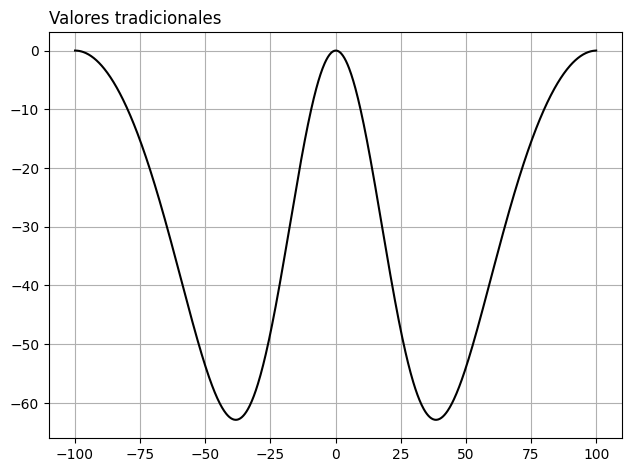

In [4]:
from AproximacionesTradicionales import AproximacionTradicional
kernel = np.power(AproximacionTradicional(x, dx), 2)

plt.figure()

plt.plot(x, np.real(kernel), 'k-')
plt.grid(True)
plt.title('Valores tradicionales', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

### Simular
Ahora vamos a simular aplicando el método de backward Euler para avanzar la ecuación diferencial.

In [5]:
cantidadPasos = 20
cantidadIteracionesIntermedias = 150

resultado = np.zeros([cantidadPasos, cantidadPuntos])

In [6]:
resultado[0, :] = np.real(DestransformacionDelCampo(campoTransformado))

for paso in range(1, cantidadPasos):

    for pasoIntermedio in range(cantidadIteracionesIntermedias):
        campoTransformado = AvanzarSimulacion(campoTransformado, dt, alfa, kernel)

    resultado[paso, :] = np.real(DestransformacionDelCampo(campoTransformado))

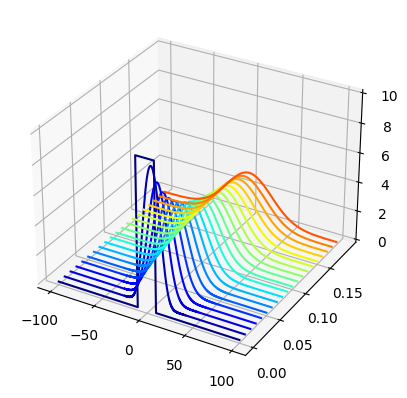

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.set_cmap('jet_r')
for j in range(cantidadPasos):
    ys = j * np.ones(cantidadPuntos) * dt
    ax.plot(x, ys, resultado[j, :], color = cm.jet(j * 11))